## 🧩 Step 1: Import Libraries
Before we dive in, let’s bring in all the essential libraries we’ll need — from data handling to model building and visualizing. This project is all about understanding employee attrition using Decision Trees

In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## 📥 Step 2: Load the Dataset
We’re using IBM’s HR dataset, which provides rich information on employee profiles, performance, and whether or not they left the company. Let’s take a first look at what the data looks like.

In [2]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Peek at the first few rows
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 🔍 Step 3: Basic Data Overview
Let’s ensure our data is clean. We’ll check data types and make sure we don’t have any missing values that might throw off our model later.

In [3]:
# Dataset info
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


## 🎯 Step 4: Preprocessing
We clean the dataset by dropping irrelevant or constant columns and encode our target column Attrition. Categorical features are also transformed using Label Encoding so the Decision Tree can understand them.



In [4]:
# Drop columns that are either identifiers or constant
df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1, inplace=True)

# Encode target variable
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Label Encoding for categorical features
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


## 📊 Step 5: Exploratory Data Analysis (EDA)
EDA helps us uncover patterns. We look at how many people left, explore salary distribution across attrition status, and analyze correlations between features.



/tmp/ipython-input-5-2731635931.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='Set2')


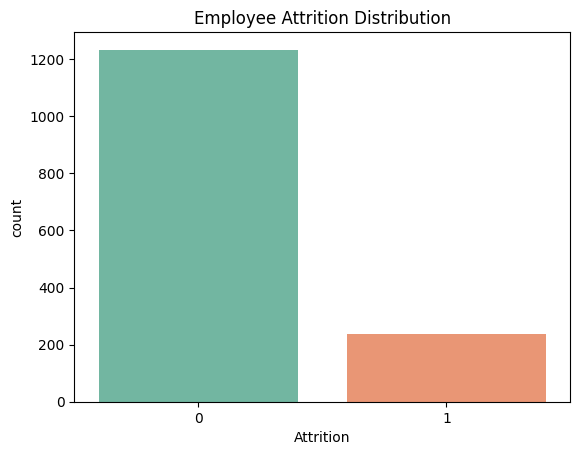

In [5]:
# Attrition Distribution
sns.countplot(x='Attrition', data=df, palette='Set2')
plt.title("Employee Attrition Distribution")
plt.show()


In [6]:
# Monthly Income by Attrition
fig = px.box(df, x='Attrition', y='MonthlyIncome', color='Attrition', title="Monthly Income by Attrition")
fig.show()


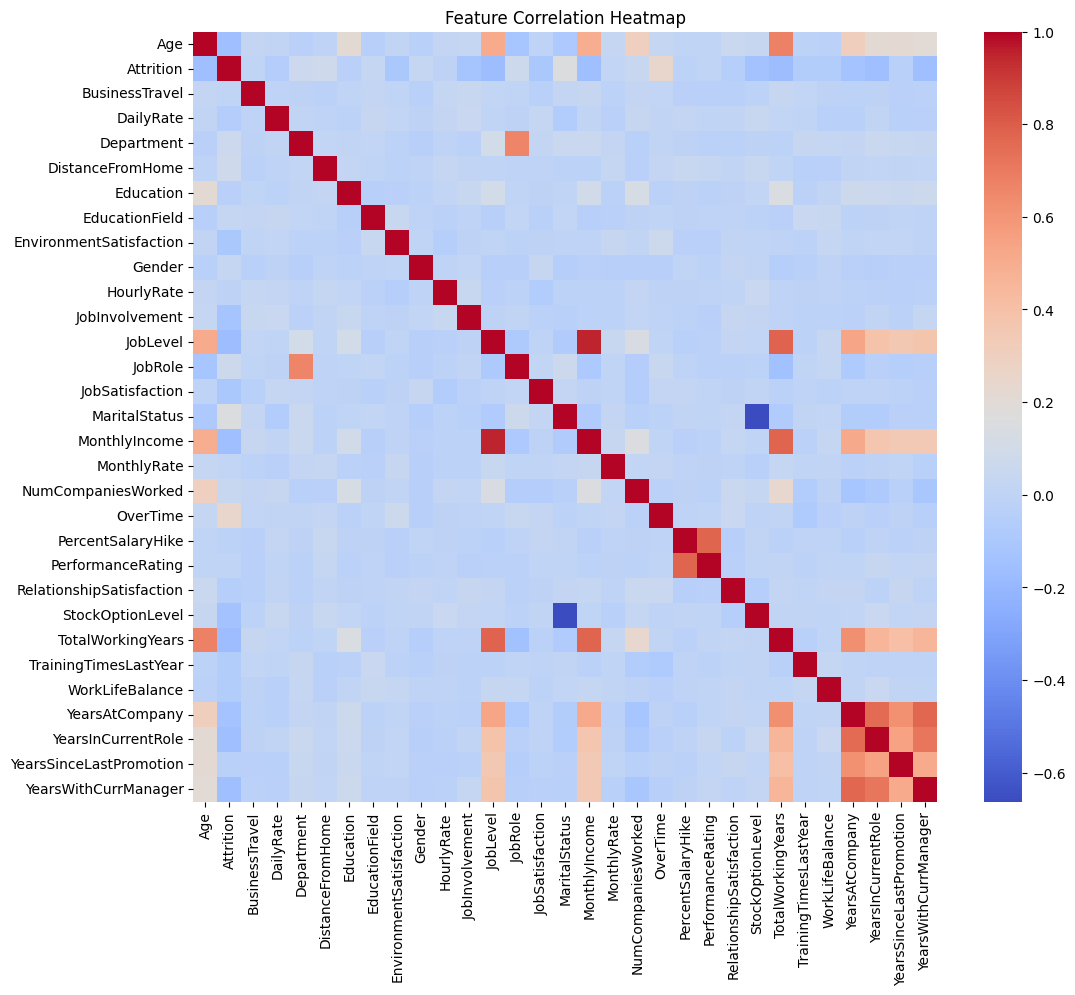

In [7]:
# Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


## ✂️ Step 6: Train/Test Split
We split the data so we can train our model on one portion and test its performance on unseen data. Stratifying ensures balanced attrition classes in both sets.



In [8]:
# Features and target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## 🌲 Step 7: Train Decision Tree Classifier
Now we train a Decision Tree model. We use a limited tree depth to prevent overfitting and improve interpretability.

In [9]:
# Initialize and train
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

## 📈 Step 8: Visualize the Tree
The decision tree diagram helps us interpret the logic behind the predictions. It’s one of the key benefits of using tree-based models.



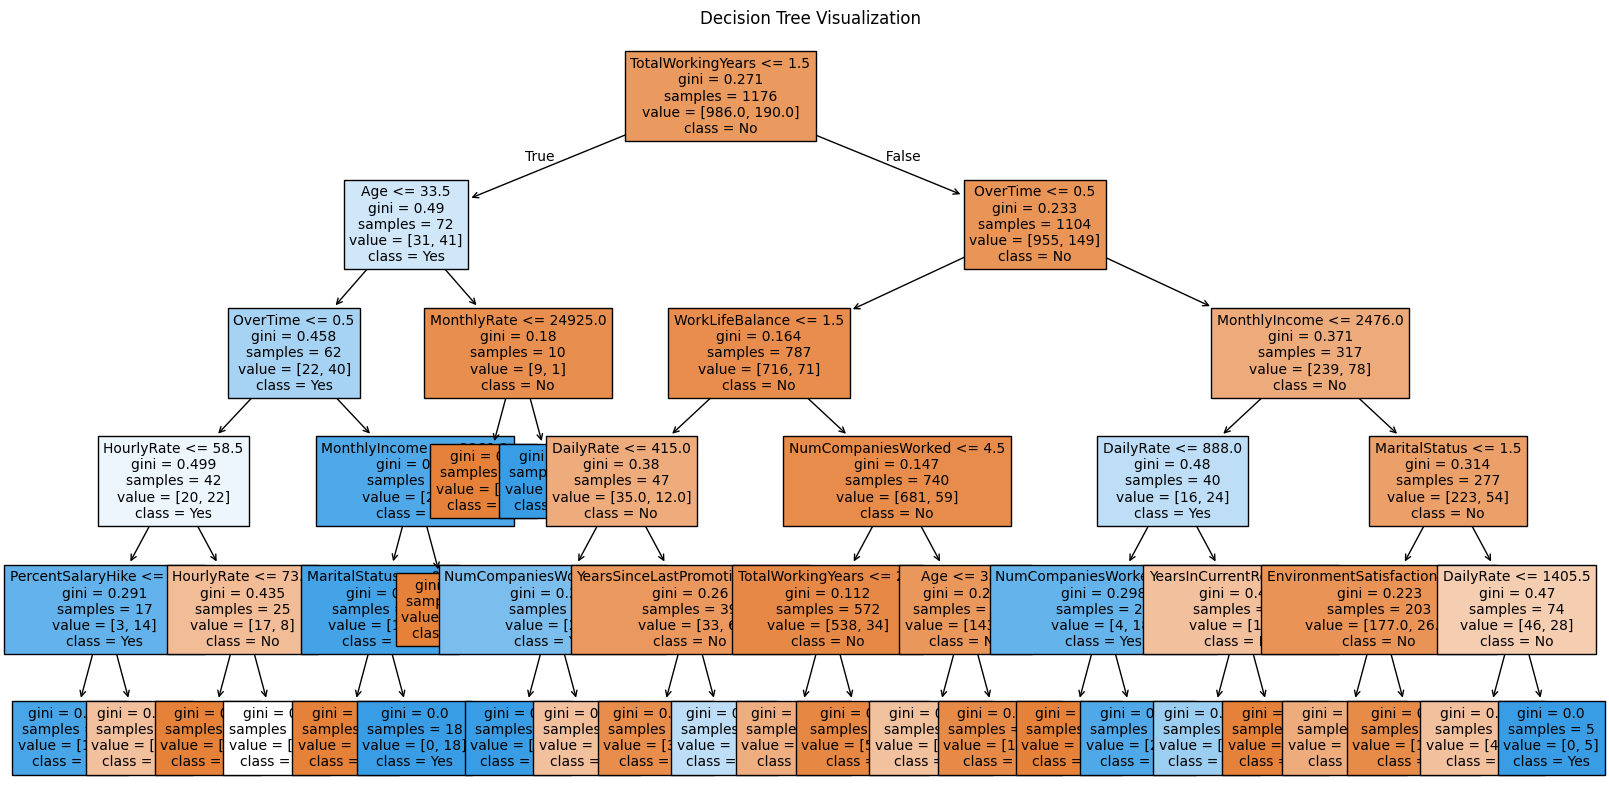

In [17]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()


## 🧪 Step 9: Evaluate on Test Set
Finally, we evaluate how well our model performs. We look at metrics like accuracy, precision, recall, and a confusion matrix to understand the types of errors it’s making.



In [11]:
# Predict
y_pred = model.predict(X_test)

# Accuracy
print(f"✅ Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")

# Classification Report
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

✅ Accuracy Score: 0.8435

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       247
           1       0.53      0.19      0.28        47

    accuracy                           0.84       294
   macro avg       0.70      0.58      0.60       294
weighted avg       0.81      0.84      0.81       294



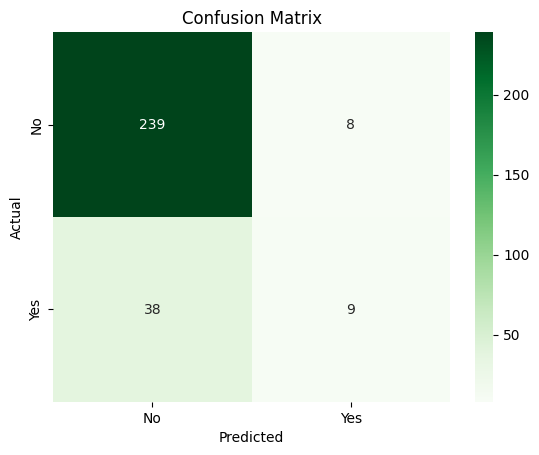

In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 🔍 Step 10: Feature Importance Visualization
Which features mattered most in predicting attrition? This plot shows the top drivers behind employee exits based on how often they appear in the decision-making process of the tree.

/tmp/ipython-input-18-747476257.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




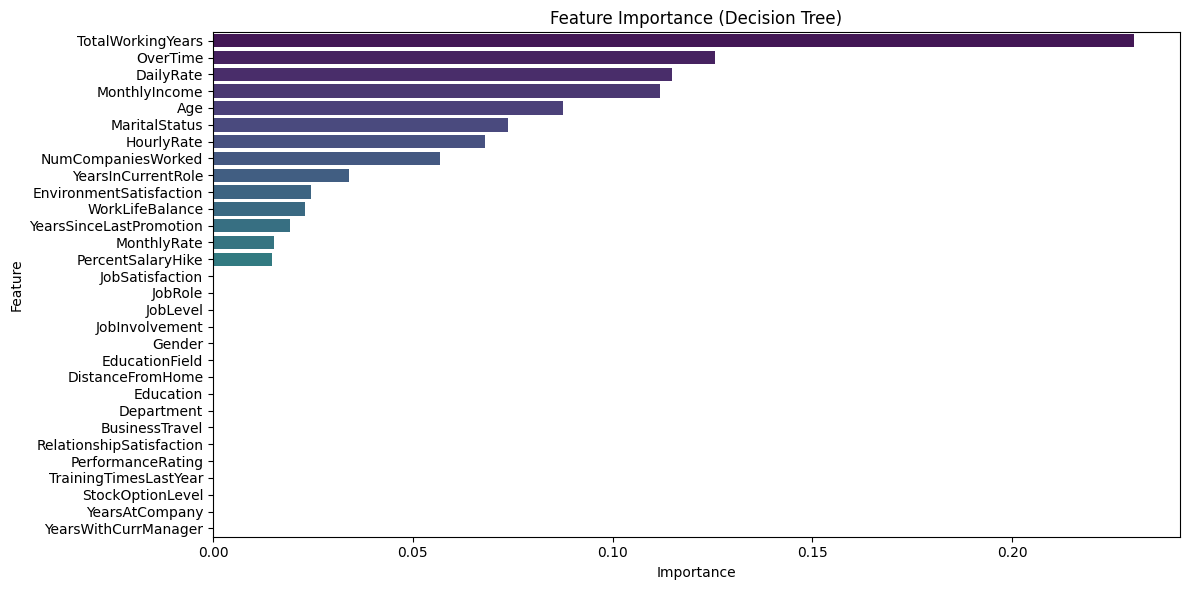

In [18]:
# Get feature importances from the trained model
importances = model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title("Feature Importance (Decision Tree)")
plt.tight_layout()
plt.show()


## 💾 Step 11: Save the Trained Model
To reuse this model later — in a web app, notebook, or pipeline — we save it using joblib. This way, we don't need to retrain it each time!



In [14]:
import joblib

# Save the model to a file
joblib.dump(model, 'decision_tree_hr_attrition_model.pkl')
print("✅ Model saved as 'decision_tree_hr_attrition_model.pkl'")


✅ Model saved as 'decision_tree_hr_attrition_model.pkl'
